# Question2: BERT


In [2]:
# load the ParsBERT model:
from transformers import BertTokenizer, AutoConfig, AutoTokenizer, AutoModel
model_name = "HooshvareLab/bert-base-parsbert-uncased"
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


## 2.1 Preprocessing

In [69]:
# load the FarsTail dataset:
import pandas as pd

train_data = pd.read_csv('data/Train-word.csv', sep='\t')
val_data = pd.read_csv('data/Val-word.csv', sep='\t')
test_data = pd.read_csv('data/Test-word.csv', sep='\t')


In [3]:
# Preprocessing the the persian dataset:
import re
import string
import hazm
# from hazm import stopwords_list
# from hazm import Normalizer, Stemmer, Lemmatizer, word_tokenize, sent_tokenize
# from hazm import SequenceTagger, POSTagger, DependencyParser, ConstituencyParser, find_chunks
from hazm import *

In [42]:
print(type(test_data['hard(overlap)'][0]))
print(test_data.columns)
print(test_data['premise'][0])
print(tokenizer.tokenize(sent_tokenize(test_data['premise'][0])[0]))
tokenizer1 = BertTokenizer.from_pretrained(model_name)
print(tokenizer1.tokenize(sent_tokenize(test_data['premise'][0])[0]))

print('اولین' in stopwords_list())

<class 'numpy.int64'>

Index(['premise', 'hypothesis', 'label', 'hard(hypothesis)', 'hard(overlap)'], dtype='object')

دوران امامت امام صادق علیه السلام، مصادف است با ترجمه آثار یونانی و گسترش مبارزات فکری و ایدئولوژیکی و نیز ظهور مذاهب و مکتب های انحرافی.

['دوران', 'امامت', 'امام', 'صادق', 'علیه', 'السلام', '،', 'مصادف', 'است', 'با', 'ترجمه', 'اثار', 'یونانی', 'و', 'گسترش', 'مبارزات', 'فکری', 'و', 'ایديولوژیکی', 'و', 'نیز', 'ظهور', 'مذاهب', 'و', 'مکتب', 'های', 'انحرافی', '.']

True


In [71]:
def preprocess(text:str):
    # using the hzm normalizer:
    normalizer = Normalizer()
    text = normalizer.normalize(text)
    # tokenize using the AutoTokenizer:
    text = tokenizer.tokenize(text)
    # remove the stop words:
    tokens = [word for word in text if word not in stopwords_list()]
    # remove the punctuations:
    tokens = [word for word in tokens if word not in string.punctuation]
    # presian punctuations:
    persian_punctuations = '،؛؟«»'
    tokens = [word for word in tokens if word not in persian_punctuations]
    # # remove the numbers:
    # tokens = [word for word in tokens if not word.isdigit()]
    # # stemming the words:
    # stemmer = Stemmer()
    # tokens = stemmer.stem(tokens)
    # posTagger = POSTagger(model='pos_tagger.model')
    # tokens = posTagger.tag(tokens)
    # lemmatizing the words:
    lemmatizer = Lemmatizer()
    # tokens = [lemmatizer.lemmatize(*token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


In [73]:
tt = preprocess(train_data['premise'][0])
print(tt)
print(train_data['premise'][0])
# convert the labels(str) to labels(int):
print(ord('،'))
print('،' in string.punctuation)

انتقال نفوذ طبیعی فرهنگ تمدن اسلام اروپا طریق کانون جغرافیایی مصر اندلس سیسیل انجام انچه توانست#توان انتقال سرعت بخشید#بخش جنگ صلیب

اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی به اروپا از طریق کانون های جغرافیایی مصر، اندلس و سیسیل انجام گرفت و آنچه توانست به روند این انتقال سرعت بخشد جنگ های صلیبی بود.

1548

False


In [ ]:
# # convert the words to tokens:
# train_data['premise'] = train_data['premise'].apply(preprocess)
# train_data['hypothesis'] = train_data['hypothesis'].apply(preprocess)
# val_data['premise'] = val_data['premise'].apply(preprocess)
# val_data['hypothesis'] = val_data['hypothesis'].apply(preprocess)
# test_data['premise'] = test_data['premise'].apply(preprocess)
# test_data['hypothesis'] = test_data['hypothesis'].apply(preprocess)

In [75]:
# # save:
# train_data.to_csv('data/Train-word-preprocessed.csv', index=False)
# val_data.to_csv('data/Val-word-preprocessed.csv', index=False)
# test_data.to_csv('data/Test-word-preprocessed.csv', index=False)

In [76]:
test_data['premise'][0]

'دوران امامت امام صادق علیهالسلام مصادف ترجمه اثار یونان گسترش مبارزات فکر ایديولوژیکی ظهور مذاهب مکتب انحراف'

In [34]:
sentences =  sent_tokenize('ما هم برای وصل کردن آمدیم! ولی برای پردازش، جدا بهتر نیست؟')
print(sentences)
tokens_per_sen = [word_tokenize(sent) for sent in sentences]
print(tokens_per_sen)
tokens = word_tokenize('ما هم برای وصل کردن آمدیم! ولی برای پردازش، جدا بهتر نیست؟')
posTagger = POSTagger(model = 'pos_tagger.model')
pos_tags = posTagger.tag(tokens)
print(pos_tags)
pos_tags_per_sen = posTagger.tag_sents(tokens_per_sen)
print(pos_tags_per_sen)
lemmatizer = Lemmatizer()
lemmas = lemmatizer.lemmatize(*pos_tags[0])
print(lemmas)

['ما هم برای وصل کردن آمدیم!', 'ولی برای پردازش، جدا بهتر نیست؟']

[['ما', 'هم', 'برای', 'وصل', 'کردن', 'آمدیم', '!'], ['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']]

[('ما', 'PRON'), ('هم', 'CCONJ'), ('برای', 'ADP,EZ'), ('وصل', 'NOUN'), ('کردن', 'NOUN'), ('آمدیم', 'VERB'), ('!', 'PUNCT'), ('ولی', 'CCONJ'), ('برای', 'ADP,EZ'), ('پردازش', 'NOUN'), ('،', 'PUNCT'), ('جدا', 'ADJ'), ('بهتر', 'ADJ'), ('نیست', 'VERB'), ('؟', 'PUNCT')]

[[('ما', 'PRON'), ('هم', 'CCONJ'), ('برای', 'ADP,EZ'), ('وصل', 'NOUN'), ('کردن', 'NOUN'), ('آمدیم', 'VERB'), ('!', 'PUNCT')], [('ولی', 'CCONJ'), ('برای', 'ADP,EZ'), ('پردازش', 'NOUN'), ('،', 'PUNCT'), ('جدا', 'ADJ'), ('بهتر', 'ADJ'), ('نیست', 'VERB'), ('؟', 'PUNCT')]]

ما


#### draw the  figures:

In [1]:
import pandas as pd
from transformers import AutoTokenizer
model_name = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [2]:
# load:
train_data = pd.read_csv('data/Train-word-preprocessed.csv')
val_data = pd.read_csv('data/Val-word-preprocessed.csv')
test_data = pd.read_csv('data/Test-word-preprocessed.csv')

In [3]:
# Show the statistic of the dataset:

#  A total of 10,367 samples are generated from a collection of 3,539 multiple-choice questions.
# The train, validation, and test portions include 7,266, 1,537, and 1,564 instances, respectively. 
import matplotlib.pyplot as plt
def show_statics(datasets):
    for key, dataset in datasets.items():
        print(key)
        print(dataset.shape)
        print(dataset.columns)
        print(dataset['label'].unique())
        print(dataset['label'].value_counts())
        print(dataset['label'].value_counts(normalize=True))
        t1 = dataset['premise'].apply(lambda x: len(tokenizer.tokenize(x))) + \
            dataset['hypothesis'].apply(lambda x: len(tokenizer.tokenize(x)))
        print("the max length:", t1.max())
        # histogram of label
        plt.hist(dataset['label'], label=f'{key}_label')
        plt.legend()
        plt.show()
        # histogram of text length
        # premise
        split_len = lambda x: len(x.split())
        plt.hist(dataset['premise'].apply(split_len), label=f'{key}_premise')
        plt.legend()
        plt.show()
        # hypothesis
        plt.hist(dataset['hypothesis'].apply(split_len), label=f'{key}_hypothesis')
        plt.legend()
        plt.show()
        # premise + hypothesis
        plt.hist((dataset['premise'].apply(split_len) + dataset['hypothesis'].apply(split_len)),
                  label=f'{key}_premise+hypothesis')
        plt.legend()
        plt.show()
        if key == 'test':
            print(dataset['hard(hypothesis)'].value_counts())
            print(dataset['hard(hypothesis)'].value_counts(normalize=True))
            # histogram of hard(hypothesis)
            plt.hist(dataset['hard(hypothesis)'], label=f'{key}_hard(hypothesis)')
            plt.legend()
            plt.show()
            print(dataset['hard(overlap)'].value_counts())
            print(dataset['hard(overlap)'].value_counts(normalize=True))
            # histogram of hard(overlap)
            plt.hist(dataset['hard(overlap)'], label=f'{key}_hard(overlap)')
            plt.legend()
            plt.show()
            # histogram of hard(hypothesis) + hard(overlap)
            combined = dataset.apply(lambda row: f"{row['hard(hypothesis)']}-{row['hard(overlap)']}", axis=1)
            combined = combined.value_counts()
            print(combined)
            plt.bar(combined.index, combined.values)
            plt.title(f'{key}_hard(hypothesis) + hard(overlap)')
            plt.show()

        print('------------------------')


train

(7266, 3)

Index(['premise', 'hypothesis', 'label'], dtype='object')

['e' 'c' 'n']

label

n    2448

e    2429

c    2389

Name: count, dtype: int64

label

n    0.336912

e    0.334297

c    0.328792

Name: proportion, dtype: float64

the max length: 131


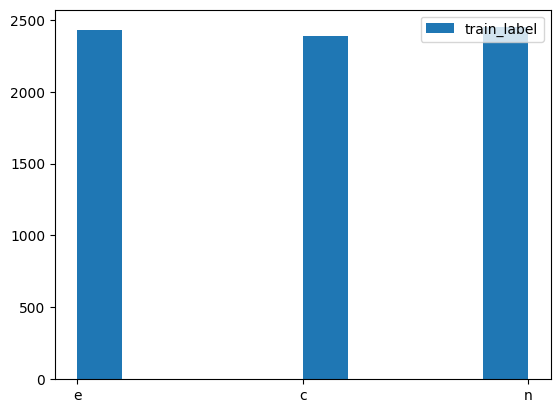

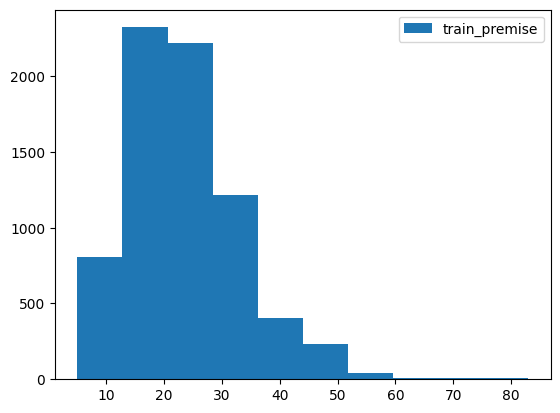

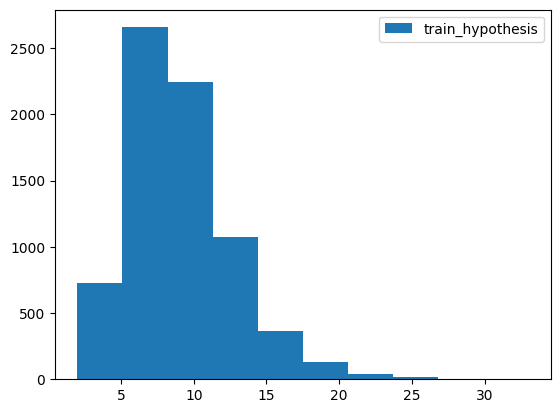

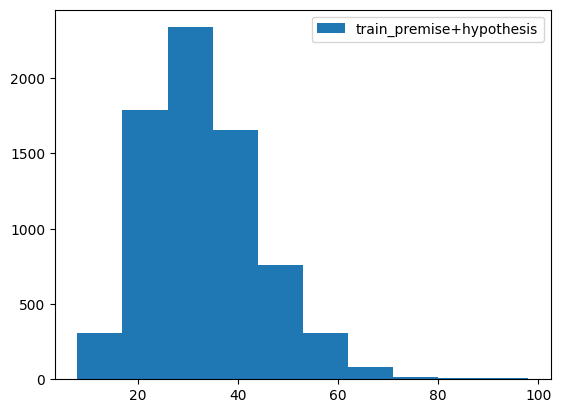

------------------------

val

(1537, 3)

Index(['premise', 'hypothesis', 'label'], dtype='object')

['e' 'c' 'n']

label

n    523

e    515

c    499

Name: count, dtype: int64

label

n    0.340273

e    0.335068

c    0.324658

Name: proportion, dtype: float64

the max length: 89


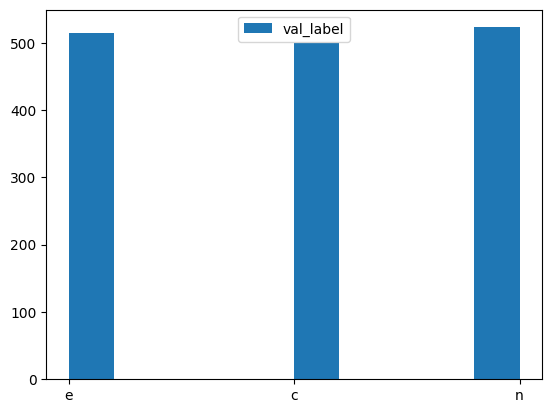

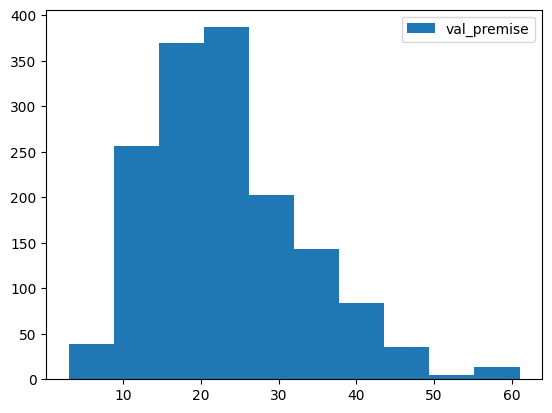

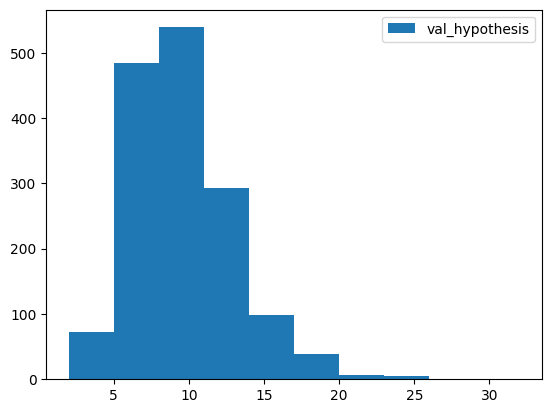

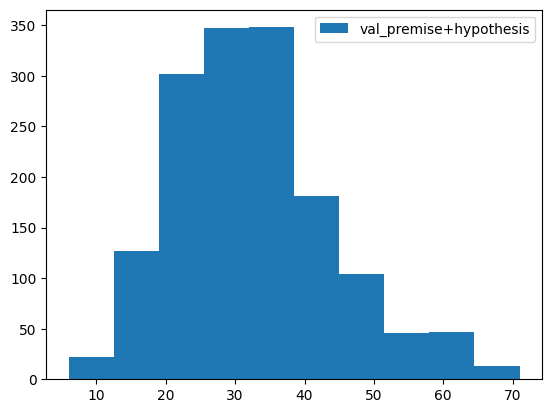

------------------------

test

(1564, 5)

Index(['premise', 'hypothesis', 'label', 'hard(hypothesis)', 'hard(overlap)'], dtype='object')

['c' 'n' 'e']

label

n    535

e    519

c    510

Name: count, dtype: int64

label

n    0.342072

e    0.331841

c    0.326087

Name: proportion, dtype: float64

the max length: 118


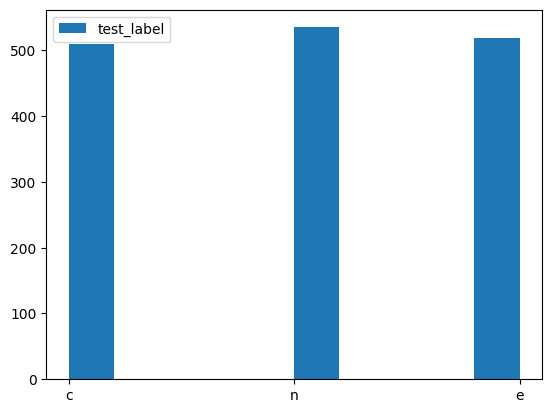

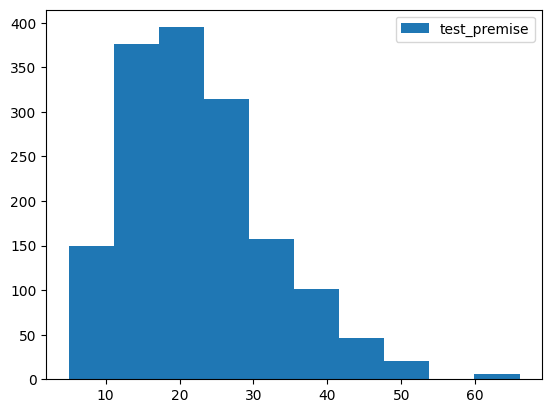

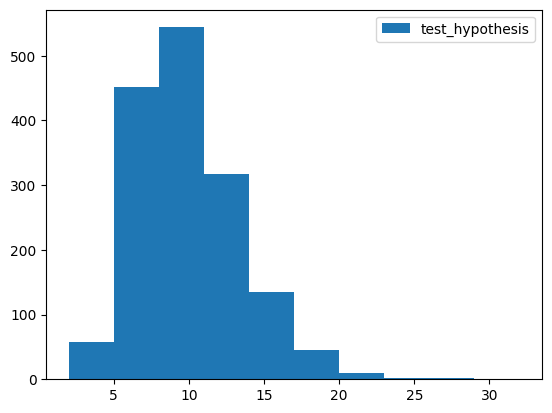

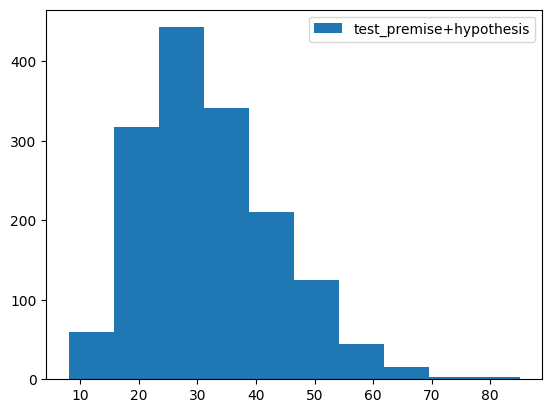

hard(hypothesis)

0    865

1    699

Name: count, dtype: int64

hard(hypothesis)

0    0.553069

1    0.446931

Name: proportion, dtype: float64


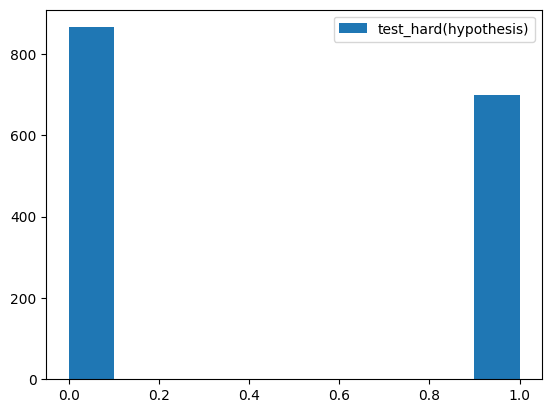

hard(overlap)

0    883

1    681

Name: count, dtype: int64

hard(overlap)

0    0.564578

1    0.435422

Name: proportion, dtype: float64


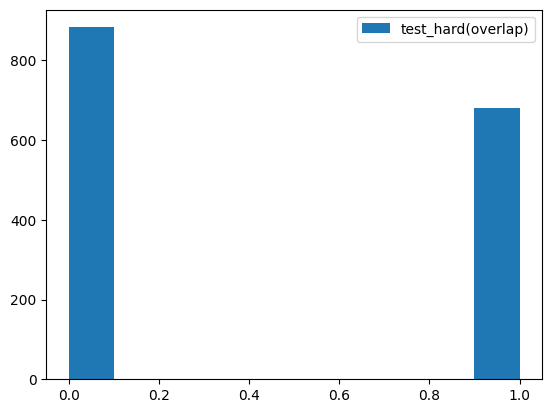

0-0    497

1-0    386

0-1    368

1-1    313

Name: count, dtype: int64


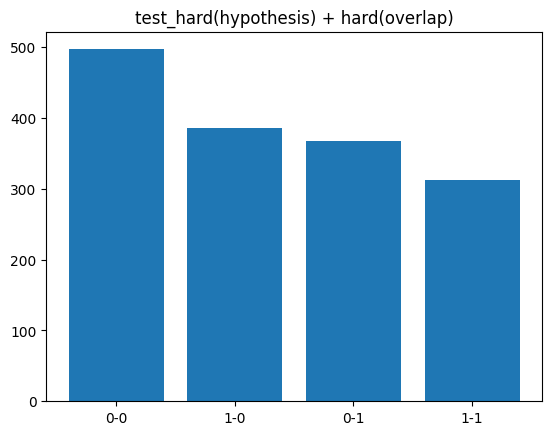

------------------------


In [4]:
datasets = {
    'train': train_data,
    'val': val_data,
    'test': test_data
}
show_statics(datasets)

In [5]:
#  the max length is 130 we can take 150;
train_data.head()
test_data.head()

,premise,hypothesis,label,hard(hypothesis),hard(overlap)
0,دوران امامت امام صادق علیهالسلام مصادف ترجمه ا...,امام سجاد دوران امامت همزمان ترجمه اثار یونان ...,c,0,1
1,دوران امامت امام صادق علیهالسلام مصادف ترجمه ا...,دستگاه فاسد حکومت هزینه هنگفت جعل احادیث ایجاد...,n,1,0
2,شهادت امام رضا مرحله جدید تلاش ايمه اغاز [UNK]...,دوران محنت اهلبیت شهادت امام رضا اغاز گشت#گرد,e,0,0
3,شهادت امام رضا مرحله جدید تلاش ايمه اغاز [UNK]...,شهادت امام هادی دوران محنت اهلبیت,c,1,1
4,شهادت امام رضا مرحله جدید تلاش ايمه اغاز [UNK]...,حضرت جواد سال ۱۹۵ هجری مدینه ولادت,n,1,0


## 2.2 fine-tuning the BERT

In [21]:
import pandas as pd
# load the ParsBERT model:
from transformers import AutoConfig, AutoTokenizer, AutoModel,BertForSequenceClassification
model_name = "HooshvareLab/bert-base-parsbert-uncased"
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# load:
# /kaggle/input/mydata/data
import pandas as pd

start_dir = "/kaggle/input/mydata/"
train_data = pd.read_csv(start_dir + 'data/Train-word-preprocessed.csv')
val_data = pd.read_csv(start_dir +'data/Val-word-preprocessed.csv')
test_data = pd.read_csv(start_dir +'data/Test-word-preprocessed.csv')

In [23]:
# # convert premise and hypothesis to the correct input for the BERT model using the tokenizer.encode_plus method:
# # train_data:
# train_data['input_'] = train_data.apply(lambda row: 
#     tokenizer.encode_plus(row['premise'], row['hypothesis'],
#         add_special_tokens=True, return_tensors='pt', max_length=150, truncation=True, padding='max_length'), axis=1)

# # val_data:
# val_data['input_'] = val_data.apply(lambda row: 
#     tokenizer.encode_plus(row['premise'], row['hypothesis'],
#         add_special_tokens=True, return_tensors='pt', max_length=150, truncation=True, padding='max_length'), axis=1)

# # test_data:
# test_data['input_'] = test_data.apply(lambda row: 
#     tokenizer.encode_plus(row['premise'], row['hypothesis'],
#         add_special_tokens=True, return_tensors='pt', max_length=150, truncation=True, padding='max_length'), axis=1)

# # check:
# print(train_data['input_'][0].keys())
# print(train_data['input_'][0]['input_ids'].shape)
# print(train_data['input_'][0]['attention_mask'].shape)
# print(train_data['input_'][0]['token_type_ids'].shape)
# print(train_data.columns)

In [24]:
# convert the lables to indices:
label2idx = {label: idx for idx, label in enumerate(train_data['label'].unique())}
print(label2idx)

# convert the labels to indices:
train_data['label'] = train_data['label'].apply(lambda x: label2idx[x])
val_data['label'] = val_data['label'].apply(lambda x: label2idx[x])
test_data['label'] = test_data['label'].apply(lambda x: label2idx[x])


{'e': 0, 'c': 1, 'n': 2}


In [25]:
# 1. add the special tokens:
# 2. pad the sentences to the max length:
# 3. convert the tokens to the ids:
# 4. create the attention masks:
# 5. create the token type ids:

In [26]:
# check to see it the cuda os available:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
import torch
from tqdm import tqdm

# Assuming you have a custom dataset
class NliDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        return item['premise'], item['hypothesis'], item['label']

# Implement Collate function
def collate_fn(batch):
    # batch: batch_size * 3
    premises = [sample[0] for sample in batch]
    hypotheses = [sample[1] for sample in batch]
    labels = [sample[2] for sample in batch]
    labels = torch.tensor(labels)
    inputs = tokenizer(premises, hypotheses, padding='longest', truncation=True, max_length=150, return_tensors='pt')
    # print(inputs.keys())
    return inputs, labels

In [27]:
# Create dataset and dataloader
train_dataset = NliDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=128, collate_fn=collate_fn, shuffle=True, pin_memory=True)
val_dataset = NliDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=256, collate_fn=collate_fn, shuffle=False)
test_dataset = NliDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=256, collate_fn=collate_fn, shuffle=False)

In [28]:
for temp in train_loader:
    batch1 = temp[0]
    print(temp[1].dtype)
    print(type(batch1))
    print(len(batch1))
    print(batch1['input_ids'].dtype, 
          batch1['attention_mask'].shape, batch1['token_type_ids'].shape)
    break

print(len(train_loader))

torch.int64
<class 'transformers.tokenization_utils_base.BatchEncoding'>
3
torch.int64 torch.Size([128, 79]) torch.Size([128, 79])
57


In [29]:
import gc

torch.cuda.empty_cache()
gc.collect()
model.to(device)
print(device)


cuda


In [30]:
from torch.cuda.amp import GradScaler, autocast

for batch in train_loader:
    # Get the input data
    inputs = batch[0]
    inputs = {
        'input_ids': inputs['input_ids'].to(device),
        'attention_mask': inputs['attention_mask'].to(device),
        'token_type_ids': inputs['token_type_ids'].to(device),
    }
    labels = batch[1].to(device)

    # Forward pass
    with autocast():  # Automatic mixed precision
        outputs = model(**inputs)
        # calculate the predicated class:
        _, preds = torch.max(outputs.logits, dim=1)
        print(_, preds)
        acc = torch.sum(preds == labels) / len(labels)
        loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
        print(acc.item(),loss.item())
    break


tensor([ 9.0869e-01,  8.5596e-01,  8.0664e-01,  8.4766e-01,  7.3242e-01,
         7.8418e-01,  8.4326e-01,  7.7832e-01,  8.3936e-01,  4.7900e-01,
         8.6572e-01,  8.5303e-01,  7.2705e-01,  8.9404e-01,  7.9980e-01,
         8.2715e-01,  7.8027e-01,  7.7686e-01,  6.1768e-01,  7.4854e-01,
         7.4609e-01,  7.2998e-01,  8.4229e-01,  7.0166e-01,  7.4268e-01,
         7.7686e-01,  6.9141e-01,  7.7539e-01,  8.4961e-01,  6.9629e-01,
         8.4180e-01,  8.1494e-01,  8.0225e-01,  7.3340e-01,  7.4219e-01,
         9.2480e-01,  7.9688e-01,  7.9297e-01,  7.5879e-01,  7.5977e-01,
         1.9031e-01,  7.5586e-01,  8.0518e-01,  6.1475e-01,  8.5107e-01,
         4.8975e-01,  7.1631e-01,  8.5205e-01,  8.5059e-01,  5.9473e-01,
         4.9854e-01,  9.2236e-01,  5.2344e-01,  7.4951e-01,  6.9531e-01,
         8.3203e-01,  8.7207e-01,  7.4512e-01,  6.8848e-01,  8.5645e-01,
         9.2578e-01,  7.9346e-01,  8.6426e-01,  8.3984e-01,  7.4170e-01,
         8.3594e-01,  8.1006e-01,  6.4453e-01, -3.0

In [31]:
import gc
import torch
from torch.cuda.amp import GradScaler, autocast

# Enable automatic mixed precision
scaler = GradScaler()
model.to(device)
train_losses = []
val_losses = []
train_accs = []
val_accs = []

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 5

for epoch in (range(num_epochs)):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    for idx, batch in tqdm(enumerate(train_loader), total=len(train_loader)):
        # Get the input data
        inputs = batch[0]
        inputs = {
            'input_ids': inputs['input_ids'].to(device),
            'attention_mask': inputs['attention_mask'].to(device),
            'token_type_ids': inputs['token_type_ids'].to(device),
        }
        labels = batch[1].to(device)
        
        # Forward pass
        with autocast():  # Automatic mixed precision
            outputs = model(**inputs)
            # calculate the predicated class:
            _, preds = torch.max(outputs.logits, dim=1)
            # calculate the accuracy:
            acc = torch.sum(preds == labels) / len(labels)
            epoch_acc += acc.item()
            # calculate the loss:
            loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
            epoch_loss += loss.item()
        # Backward pass and optimization
        optimizer.zero_grad()
        scaler.scale(loss).backward()  # Scale loss to maintain precision
        scaler.step(optimizer)  # Optimizer step
        scaler.update()
        # Cleanup
        del inputs, labels, outputs, loss
        torch.cuda.empty_cache()
        gc.collect()
    # Calculate the average loss and accuracy over all of the batches
    train_losses.append(epoch_loss / len(train_loader))
    train_accs.append(epoch_acc / len(train_loader))
    print(f'Epoch {epoch + 1} training loss: {epoch_loss / len(train_loader)}')
    print(f'Epoch {epoch + 1} training accuracy: {epoch_acc / len(train_loader)}')

    # Validation step here
    val_epoch_loss = 0
    val_epoch_acc = 0
    model.eval()
    # Calculate loss and accuracy on validation data
    for idx, batch in tqdm(enumerate(val_loader), total=len(val_loader)):
        # Get the input data
        inputs = batch[0]
        inputs = {
            'input_ids': inputs['input_ids'].to(device),
            'attention_mask': inputs['attention_mask'].to(device),
            'token_type_ids': inputs['token_type_ids'].to(device),
        }
        labels = batch[1].to(device)
        
        # Forward pass
        with torch.no_grad():
            outputs = model(**inputs)
            # calculate the predicated class:
            _, preds = torch.max(outputs.logits, dim=1)
            # calculate the accuracy:
            acc = torch.sum(preds == labels) / len(labels)
            val_epoch_acc += acc.item()
            # calculate the loss:
            loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
            val_epoch_loss += loss.item()

        # Cleanup
        del inputs, labels, outputs, loss
        torch.cuda.empty_cache()
        gc.collect()

    val_losses.append(val_epoch_loss / len(val_loader))
    val_accs.append(val_epoch_acc / len(val_loader))
    print(f'Epoch {epoch + 1} validation loss: {val_epoch_loss / len(val_loader)}')
    print(f'Epoch {epoch + 1} validation accuracy: {val_epoch_acc / len(val_loader)}')
    print('------------------------')

100%|██████████| 57/57 [01:17<00:00,  1.35s/it]


Epoch 1 training loss: 0.8514260660138047
Epoch 1 training accuracy: 0.5833501157007719


100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 1 validation loss: 0.6266270184091159
Epoch 1 validation accuracy: 0.7120535714285714
------------------------


100%|██████████| 57/57 [01:18<00:00,  1.38s/it]


Epoch 2 training loss: 0.5844287286724961
Epoch 2 training accuracy: 0.744850406521245


100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 2 validation loss: 0.626270292326808
Epoch 2 validation accuracy: 0.73046875
------------------------


100%|██████████| 57/57 [01:19<00:00,  1.40s/it]


Epoch 3 training loss: 0.37862923636771084
Epoch 3 training accuracy: 0.8492660219209236


100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 3 validation loss: 0.6141571822975364
Epoch 3 validation accuracy: 0.7684151785714286
------------------------


100%|██████████| 57/57 [01:17<00:00,  1.36s/it]


Epoch 4 training loss: 0.27321424139173406
Epoch 4 training accuracy: 0.8976291167108637


100%|██████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 4 validation loss: 0.6875249269484941
Epoch 4 validation accuracy: 0.7589285714285714
------------------------


100%|██████████| 57/57 [01:19<00:00,  1.39s/it]


Epoch 5 training loss: 0.1785431099042558
Epoch 5 training accuracy: 0.9345489834484301


100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

Epoch 5 validation loss: 0.8142717124262292
Epoch 5 validation accuracy: 0.7667410714285714
------------------------


In [18]:
# save the mdoel:
model.save_pretrained('model')

total loss: 0.8278263977595738
final accuracy: 0.7589514066496164
1564
0.7591475300212956
0.7589514066496165
0.760491826188431
[0.76258993 0.67284523 0.84200743]
[[371 127  21]
 [ 80 363  67]
 [  3  79 453]]


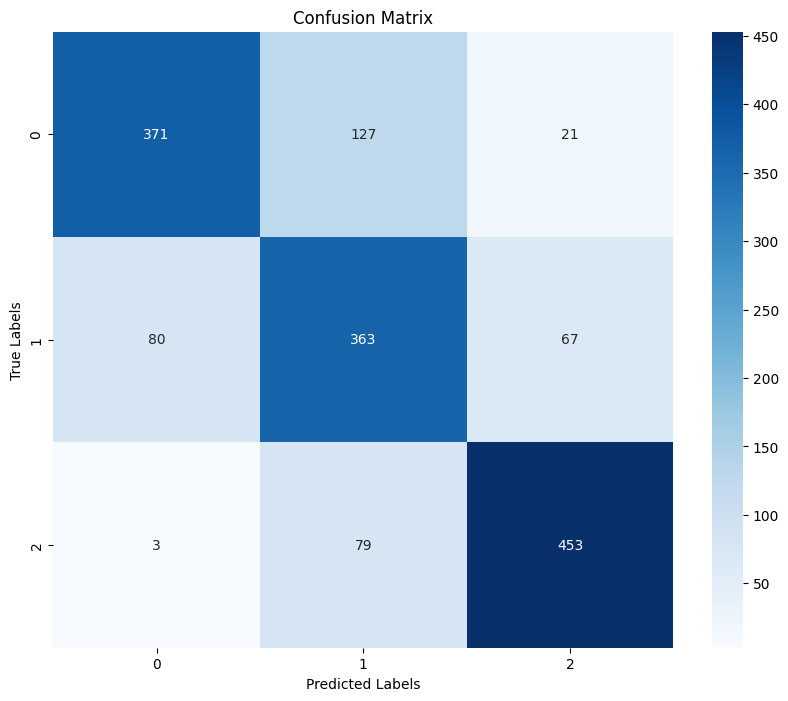

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the f1-score and the cm for the predictions:
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
total_acc = 0
total_loss = 0
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        # Get the input data
        inputs = batch[0]
        inputs = {
            'input_ids': inputs['input_ids'].to(device),
            'attention_mask': inputs['attention_mask'].to(device),
            'token_type_ids': inputs['token_type_ids'].to(device),
        }
        labels = batch[1].to(device)
        
        # Forward pass
        outputs = model(**inputs)
        # calculate the predicated class:
        _, preds = torch.max(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        # calculate the accuracy:
        acc = torch.sum(preds == labels)
        total_acc += acc.item()
        # calculate the loss:
        loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
        total_loss += loss.item()


print('total loss:', total_loss / len(test_loader))
print('final accuracy:', total_acc / len(test_dataset))
print(len(all_labels))
y_true = np.array(all_labels)
y_pred = np.array(all_preds)
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


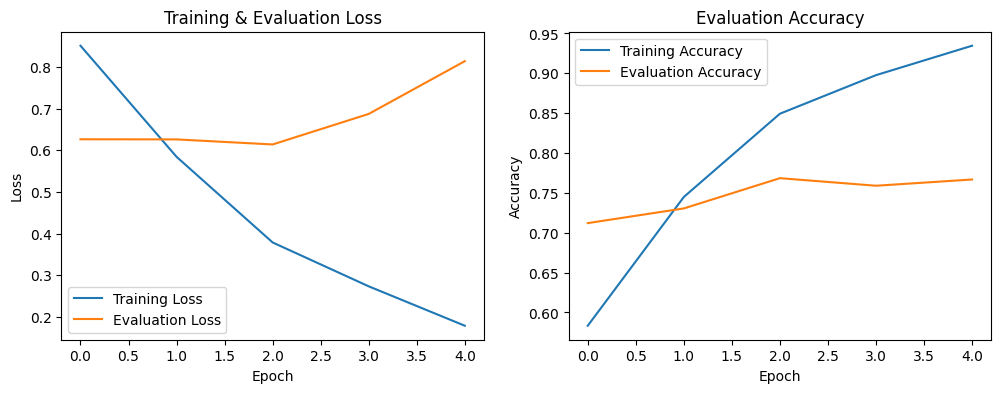

In [34]:
# plot the training and validation loss/acccuracy:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Evaluation Loss')
plt.title('Training & Evaluation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Evaluation Accuracy')
plt.title('Evaluation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [35]:
# Save the model
model.save_pretrained("./my_nli_model")


## 2.3 Freezing the BERT

In [2]:
# import the model and apply a custom mlp on the top of the model:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModel
from torch.utils.data import Dataset
import torch
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

import pandas as pd
# load the ParsBERT model:
from transformers import AutoConfig, AutoTokenizer, AutoModel,BertForSequenceClassification
model_name = "HooshvareLab/bert-base-parsbert-uncased"
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
# load:
# /kaggle/input/mydata/data
import pandas as pd

start_dir = "/kaggle/input/mydata/"
train_data = pd.read_csv(start_dir + 'data/Train-word-preprocessed.csv')
val_data = pd.read_csv(start_dir +'data/Val-word-preprocessed.csv')
test_data = pd.read_csv(start_dir +'data/Test-word-preprocessed.csv')

In [6]:
# convert the lables to indices:
label2idx = {label: idx for idx, label in enumerate(train_data['label'].unique())}
print(label2idx)

# convert the labels to indices:
train_data['label'] = train_data['label'].apply(lambda x: label2idx[x])
val_data['label'] = val_data['label'].apply(lambda x: label2idx[x])
test_data['label'] = test_data['label'].apply(lambda x: label2idx[x])

{'e': 0, 'c': 1, 'n': 2}


In [23]:
# check to see it the cuda os available:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [37]:
# Create dataset and dataloader
train_dataset = NliDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=128, collate_fn=collate_fn, shuffle=True, pin_memory=True)
val_dataset = NliDataset(val_data)
val_loader = DataLoader(val_dataset, batch_size=256, collate_fn=collate_fn, shuffle=False)
test_dataset = NliDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=256, collate_fn=collate_fn, shuffle=False)

In [15]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 5

In [36]:
# train the model:
import gc
import torch
from torch.cuda.amp import GradScaler, autocast

def train_val(model, train_loader, val_loader, optimizer, num_epochs):
    # Enable automatic mixed precision
    scaler = GradScaler()
    model.to(device)
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in (range(num_epochs)):
        model.train()
        epoch_loss = 0
        epoch_acc = 0
        for idx, batch in tqdm(enumerate(train_loader), total=len(train_loader)):
            # Get the input data
            inputs = batch[0]
            inputs = {
                'input_ids': inputs['input_ids'].to(device),
                'attention_mask': inputs['attention_mask'].to(device),
                'token_type_ids': inputs['token_type_ids'].to(device),
            }
            labels = batch[1].to(device)
            
            # Forward pass
            with autocast():  # Automatic mixed precision
                outputs = model(**inputs)
                # calculate the predicated class:
                _, preds = torch.max(outputs.logits, dim=1)
                # calculate the accuracy:
                acc = torch.sum(preds == labels) / len(labels)
                epoch_acc += acc.item()
                # calculate the loss:
                loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
                epoch_loss += loss.item()
            # Backward pass and optimization
            optimizer.zero_grad()
            scaler.scale(loss).backward()  # Scale loss to maintain precision
            scaler.step(optimizer)  # Optimizer step
            scaler.update()
            # Cleanup
            del inputs, labels, outputs, loss
            torch.cuda.empty_cache()
            gc.collect()
        # Calculate the average loss and accuracy over all of the batches
        train_losses.append(epoch_loss / len(train_loader))
        train_accs.append(epoch_acc / len(train_loader))
        print(f'Epoch {epoch + 1} training loss: {epoch_loss / len(train_loader)}')
        print(f'Epoch {epoch + 1} training accuracy: {epoch_acc / len(train_loader)}')

        # Validation step here
        val_epoch_loss = 0
        val_epoch_acc = 0
        model.eval()
        # Calculate loss and accuracy on validation data
        for idx, batch in tqdm(enumerate(val_loader), total=len(val_loader)):
            # Get the input data
            inputs = batch[0]
            inputs = {
                'input_ids': inputs['input_ids'].to(device),
                'attention_mask': inputs['attention_mask'].to(device),
                'token_type_ids': inputs['token_type_ids'].to(device),
            }
            labels = batch[1].to(device)
            
            # Forward pass
            with torch.no_grad():
                outputs = model(**inputs)
                # calculate the predicated class:
                _, preds = torch.max(outputs.logits, dim=1)
                # calculate the accuracy:
                acc = torch.sum(preds == labels) / len(labels)
                val_epoch_acc += acc.item()
                # calculate the loss:
                loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
                val_epoch_loss += loss.item()

            # Cleanup
            del inputs, labels, outputs, loss
            torch.cuda.empty_cache()
            gc.collect()

        val_losses.append(val_epoch_loss / len(val_loader))
        val_accs.append(val_epoch_acc / len(val_loader))
        print(f'Epoch {epoch + 1} validation loss: {val_epoch_loss / len(val_loader)}')
        print(f'Epoch {epoch + 1} validation accuracy: {val_epoch_acc / len(val_loader)}')
        print('------------------------')
        
    return (train_losses, val_losses, train_accs, val_accs)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the f1-score and the cm for the predictions:
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

def test(model, test_loader):
    total_acc = 0
    total_loss = 0
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            # Get the input data
            inputs = batch[0]
            inputs = {
                'input_ids': inputs['input_ids'].to(device),
                'attention_mask': inputs['attention_mask'].to(device),
                'token_type_ids': inputs['token_type_ids'].to(device),
            }
            labels = batch[1].to(device)
            
            # Forward pass
            outputs = model(**inputs)
            # calculate the predicated class:
            _, preds = torch.max(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            # calculate the accuracy:
            acc = torch.sum(preds == labels)
            total_acc += acc.item()
            # calculate the loss:
            loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)
            total_loss += loss.item()


    print('total loss:', total_loss / len(test_loader))
    print('final accuracy:', total_acc / len(test_dataset))
    print(len(all_labels))
    y_true = np.array(all_labels)
    y_pred = np.array(all_preds)
    print(f1_score(y_true, y_pred, average='macro'))
    print(f1_score(y_true, y_pred, average='micro'))
    print(f1_score(y_true, y_pred, average='weighted'))
    print(f1_score(y_true, y_pred, average=None))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [18]:
# plot the training and validation loss/acccuracy:
def plot_loss_acc(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Evaluation Loss')
    plt.title('Training & Evaluation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Evaluation Accuracy')
    plt.title('Evaluation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

#### freezing the first 9 lyaers of the model:


In [29]:
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# Freeze the first 9 layers
for name, param in model.named_parameters():
    if name.startswith('bert.encoder.layer'):
        layer_num = int(name.split('.')[3])
        if layer_num < 9:
            param.requires_grad = False
            
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 5

In [39]:
# train_dataset = NliDataset(val_data)
# train_loader = DataLoader(train_dataset, batch_size=128, collate_fn=collate_fn, shuffle=True, pin_memory=True)


100%|██████████| 57/57 [01:09<00:00,  1.22s/it]


Epoch 1 training loss: 0.24491927066915914
Epoch 1 training accuracy: 0.9058723815700465


100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


Epoch 1 validation loss: 0.5828112219418732
Epoch 1 validation accuracy: 0.8018973214285714
------------------------


100%|██████████| 57/57 [01:09<00:00,  1.21s/it]


Epoch 2 training loss: 0.16533265445838896
Epoch 2 training accuracy: 0.9350021251460963


100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


Epoch 2 validation loss: 0.6902376052644935
Epoch 2 validation accuracy: 0.7979910714285714
------------------------


100%|██████████| 57/57 [01:09<00:00,  1.22s/it]


Epoch 3 training loss: 0.11521729892283156
Epoch 3 training accuracy: 0.9571109685981483


100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


Epoch 3 validation loss: 0.7886320943299714
Epoch 3 validation accuracy: 0.7985491071428571
------------------------


100%|██████████| 57/57 [01:09<00:00,  1.22s/it]


Epoch 4 training loss: 0.10015172400234039
Epoch 4 training accuracy: 0.9645542429204572


100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


Epoch 4 validation loss: 0.7745124268923453
Epoch 4 validation accuracy: 0.7912946428571429
------------------------


100%|██████████| 57/57 [01:09<00:00,  1.22s/it]


Epoch 5 training loss: 0.08983589852588218
Epoch 5 training accuracy: 0.9667472253765976


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 5 validation loss: 0.817457317960881
Epoch 5 validation accuracy: 0.7907366071428571
------------------------


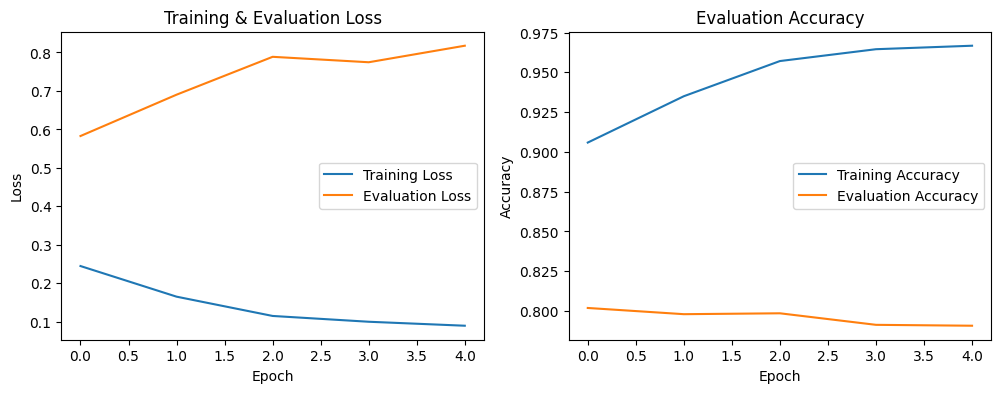

total loss: 1.1184935058866228
final accuracy: 0.7301790281329923
1564
0.7283135645944115
0.7301790281329923
0.7297312510881204
[0.75155833 0.62474645 0.80863592]
[[422  81  16]
 [146 308  56]
 [ 36  87 412]]


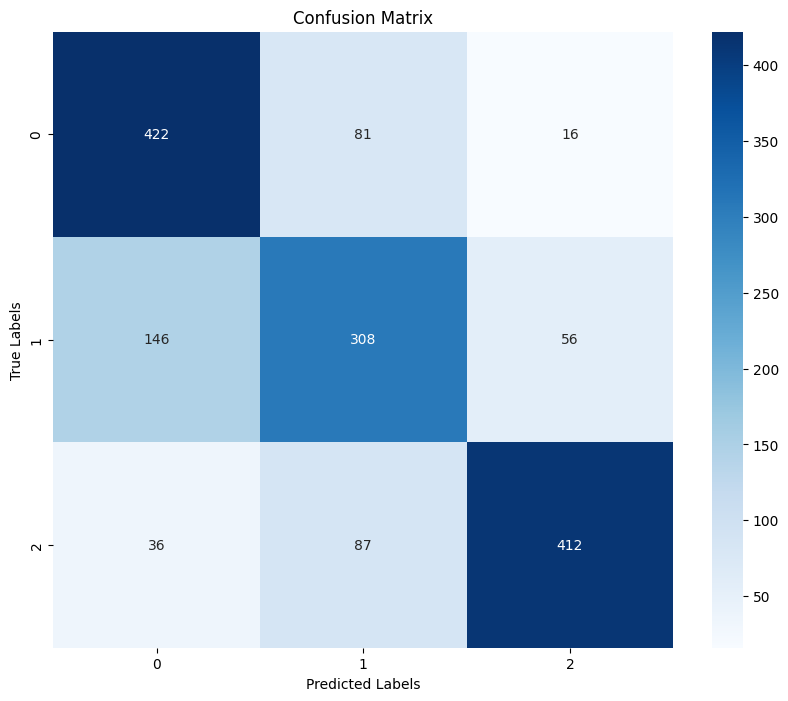

In [40]:
# train and calculate the metrics:
train_losses, val_losses, train_accs, val_accs = train_val(model,train_loader, val_loader, optimizer, num_epochs)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

# test the model:
test(model, test_loader)

#### freezing all the layers except the emebdding layer and the the last one:


In [41]:
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
#freeze:
# Freeze all layers except the last transformer layer and embedding layer
for name, param in model.named_parameters():
    if 'embeddings' not in name and 'layer.11' not in name and 'classifier' not in name:
        param.requires_grad = False

100%|██████████| 57/57 [01:06<00:00,  1.16s/it]


Epoch 1 training loss: 1.0040053223308765
Epoch 1 training accuracy: 0.47677228743569894


100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


Epoch 1 validation loss: 0.8873195818492344
Epoch 1 validation accuracy: 0.5998883928571429
------------------------


100%|██████████| 57/57 [01:05<00:00,  1.15s/it]


Epoch 2 training loss: 0.8672520936581126
Epoch 2 training accuracy: 0.5769222159134714


100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


Epoch 2 validation loss: 0.7543151293482099
Epoch 2 validation accuracy: 0.6489955357142857
------------------------


100%|██████████| 57/57 [01:06<00:00,  1.17s/it]


Epoch 3 training loss: 0.7446957742958739
Epoch 3 training accuracy: 0.6463032573984381


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 3 validation loss: 0.7496507444552013
Epoch 3 validation accuracy: 0.65625
------------------------


100%|██████████| 57/57 [01:06<00:00,  1.17s/it]


Epoch 4 training loss: 0.6534737881861234
Epoch 4 training accuracy: 0.6970047888002897


100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


Epoch 4 validation loss: 0.7513848748058081
Epoch 4 validation accuracy: 0.6512276785714286
------------------------


100%|██████████| 57/57 [01:05<00:00,  1.16s/it]


Epoch 5 training loss: 0.5565359100960848
Epoch 5 training accuracy: 0.7500363630160951


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 5 validation loss: 0.8122083287952202
Epoch 5 validation accuracy: 0.6462053571428571
------------------------


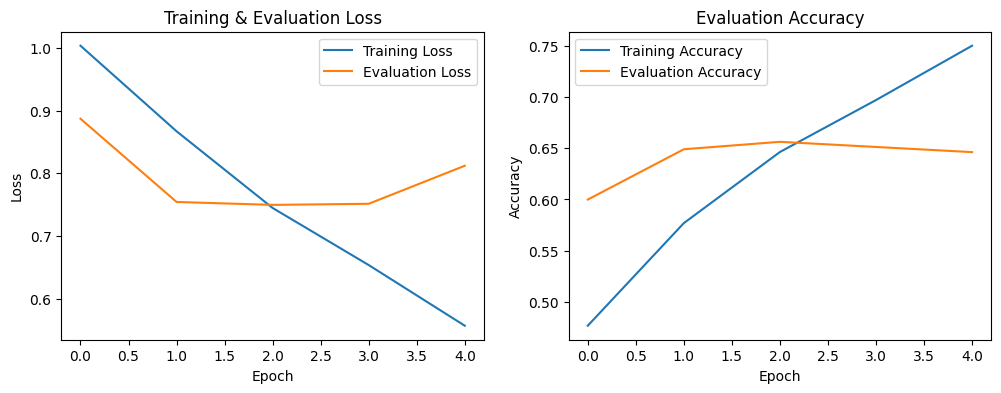

total loss: 0.9011879137584141
final accuracy: 0.6176470588235294
1564
0.6075802665996196
0.6176470588235294
0.6100609422904546
[0.67350158 0.41019956 0.73903967]
[[427  74  18]
 [274 185  51]
 [ 48 133 354]]


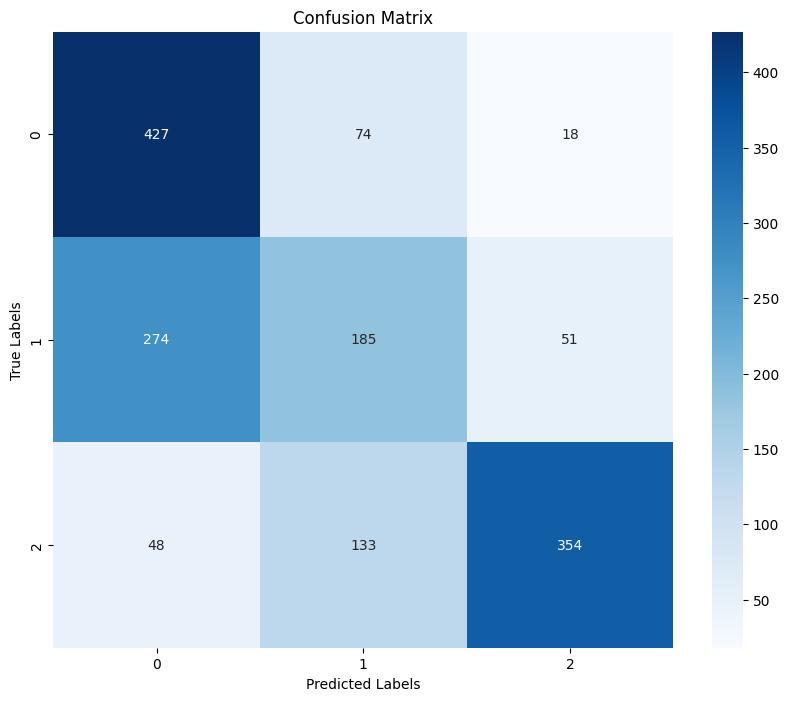

In [43]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 5

# train and calculate the metrics:
train_losses, val_losses, train_accs, val_accs =\
      train_val(model,train_loader, val_loader, optimizer, num_epochs)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

# test the model:
test(model, test_loader)

## 2.4 Fine-tuning the intermediate layers

In [44]:
# only keep the first 9 layers and remove the rest:
# load the ParsBERT model:
from transformers import AutoConfig, BertTokenizer, BertForSequenceClassification
model_name = "HooshvareLab/bert-base-parsbert-uncased"
config = AutoConfig.from_pretrained(model_name)
config.num_hidden_layers = 9
config.num_labels = 3
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 5
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-8): 9 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, 

100%|██████████| 57/57 [01:16<00:00,  1.33s/it]


Epoch 1 training loss: 0.843661956619798
Epoch 1 training accuracy: 0.5866815468721223


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 1 validation loss: 0.6455841703074319
Epoch 1 validation accuracy: 0.7103794642857143
------------------------


100%|██████████| 57/57 [01:16<00:00,  1.34s/it]


Epoch 2 training loss: 0.5636748880670782
Epoch 2 training accuracy: 0.7554544837851274


100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


Epoch 2 validation loss: 0.5625665673453893
Epoch 2 validation accuracy: 0.7700892857142857
------------------------


100%|██████████| 57/57 [01:16<00:00,  1.34s/it]


Epoch 3 training loss: 0.37080496392751994
Epoch 3 training accuracy: 0.8562897192804437


100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


Epoch 3 validation loss: 0.6338776361330279
Epoch 3 validation accuracy: 0.7845982142857143
------------------------


100%|██████████| 57/57 [01:17<00:00,  1.36s/it]


Epoch 4 training loss: 0.24346249223801128
Epoch 4 training accuracy: 0.9132848863016095


100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


Epoch 4 validation loss: 0.6803286886008989
Epoch 4 validation accuracy: 0.78125
------------------------


100%|██████████| 57/57 [01:16<00:00,  1.34s/it]


Epoch 5 training loss: 0.16432490984075948
Epoch 5 training accuracy: 0.9423614834484301


100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch 5 validation loss: 0.7878403563850692
Epoch 5 validation accuracy: 0.7684151785714286
------------------------


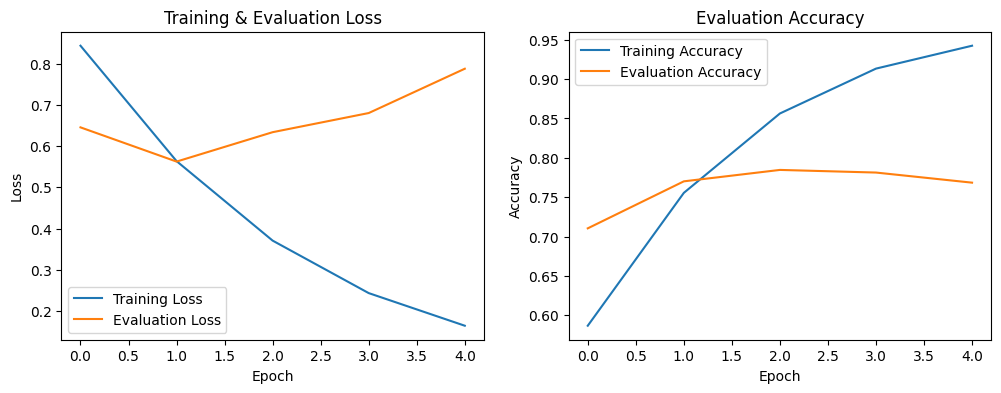

total loss: 0.8503413711275373
final accuracy: 0.7493606138107417
1564
0.7520069972879854
0.7493606138107417
0.7529668031995694
[0.78776291 0.66907776 0.79918033]
[[412  90  17]
 [106 370  34]
 [  9 136 390]]


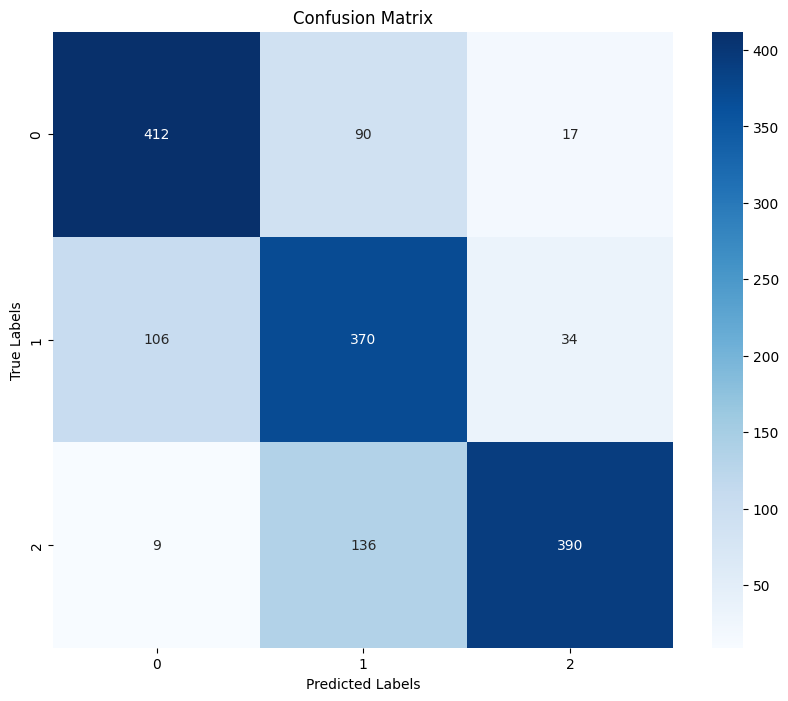

In [46]:
# train and calculate the metrics:
train_losses, val_losses, train_accs, val_accs =\
      train_val(model,train_loader, val_loader, optimizer, num_epochs)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

# test the model:
test(model, test_loader)

## 2.5 Remove the attention heads

In [47]:
# remove the 50 percent of the attention heads:
import random

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
# Prune 50% of the heads
num_layers = model.config.num_hidden_layers
num_heads = model.config.num_attention_heads
heads_to_prune = {layer: random.sample(range(num_heads), num_heads // 2) for layer in range(num_layers)}

# Apply pruning
model.prune_heads(heads_to_prune)
# 'heads_to_prune' is a dictionary where keys are layer indices and values are lists of heads to prune in that layer

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 5

print(num_heads)
print(heads_to_prune)
for name, module in model.named_modules():
    if hasattr(module, 'attention'):
        if hasattr(module.attention, 'self'):
            num_heads = module.attention.self.num_attention_heads
            print(f"{name} has {num_heads} attention heads")

12
{0: [5, 3, 11, 7, 1, 2], 1: [0, 6, 9, 2, 11, 10], 2: [8, 5, 3, 4, 2, 11], 3: [11, 3, 7, 5, 8, 1], 4: [2, 4, 9, 8, 6, 10], 5: [9, 7, 6, 10, 2, 11], 6: [3, 1, 7, 9, 4, 11], 7: [4, 1, 6, 0, 2, 5], 8: [1, 10, 11, 5, 8, 4], 9: [3, 6, 2, 9, 4, 0], 10: [0, 5, 7, 8, 3, 11], 11: [5, 1, 11, 0, 6, 9]}
bert.encoder.layer.0 has 6 attention heads
bert.encoder.layer.1 has 6 attention heads
bert.encoder.layer.2 has 6 attention heads
bert.encoder.layer.3 has 6 attention heads
bert.encoder.layer.4 has 6 attention heads
bert.encoder.layer.5 has 6 attention heads
bert.encoder.layer.6 has 6 attention heads
bert.encoder.layer.7 has 6 attention heads
bert.encoder.layer.8 has 6 attention heads
bert.encoder.layer.9 has 6 attention heads
bert.encoder.layer.10 has 6 attention heads
bert.encoder.layer.11 has 6 attention heads


100%|██████████| 57/57 [01:21<00:00,  1.43s/it]


Epoch 1 training loss: 0.9273825361017596
Epoch 1 training accuracy: 0.5332723552720589


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 1 validation loss: 0.6910515257290432
Epoch 1 validation accuracy: 0.6729910714285714
------------------------


100%|██████████| 57/57 [01:20<00:00,  1.42s/it]


Epoch 2 training loss: 0.6553850498115807
Epoch 2 training accuracy: 0.7063781106681154


100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


Epoch 2 validation loss: 0.5993880443274975
Epoch 2 validation accuracy: 0.7410714285714286
------------------------


100%|██████████| 57/57 [01:22<00:00,  1.44s/it]


Epoch 3 training loss: 0.4600089150562621
Epoch 3 training accuracy: 0.8109335836611296


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 3 validation loss: 0.6184740333950945
Epoch 3 validation accuracy: 0.7466517857142857
------------------------


100%|██████████| 57/57 [01:22<00:00,  1.44s/it]


Epoch 4 training loss: 0.3179469401376289
Epoch 4 training accuracy: 0.8779761906255755


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 4 validation loss: 0.759424753221018
Epoch 4 validation accuracy: 0.7494419642857143
------------------------


100%|██████████| 57/57 [01:21<00:00,  1.44s/it]


Epoch 5 training loss: 0.24330171942710876
Epoch 5 training accuracy: 0.9075590758992914


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 5 validation loss: 0.756118036141353
Epoch 5 validation accuracy: 0.7399553571428571
------------------------


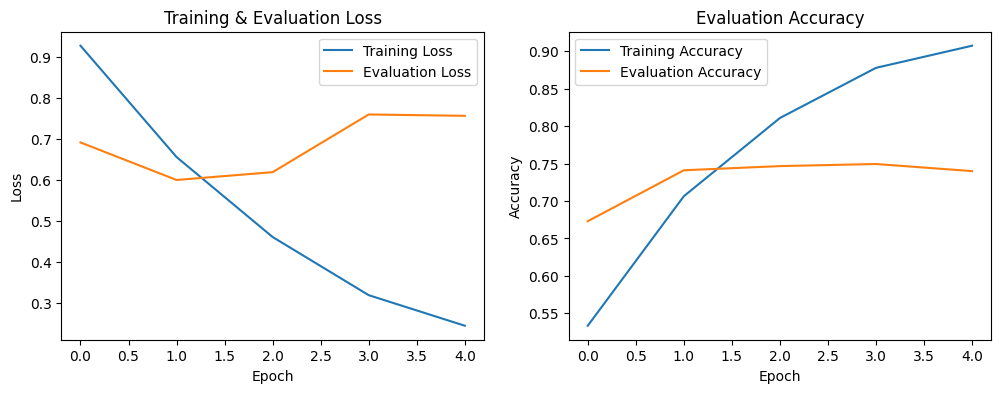

total loss: 0.8417168685368129
final accuracy: 0.7122762148337596
1564
0.7180733034354813
0.7122762148337596
0.7192060722287066
[0.73216132 0.63819095 0.78386763]
[[354 153  12]
 [ 88 381  41]
 [  6 150 379]]


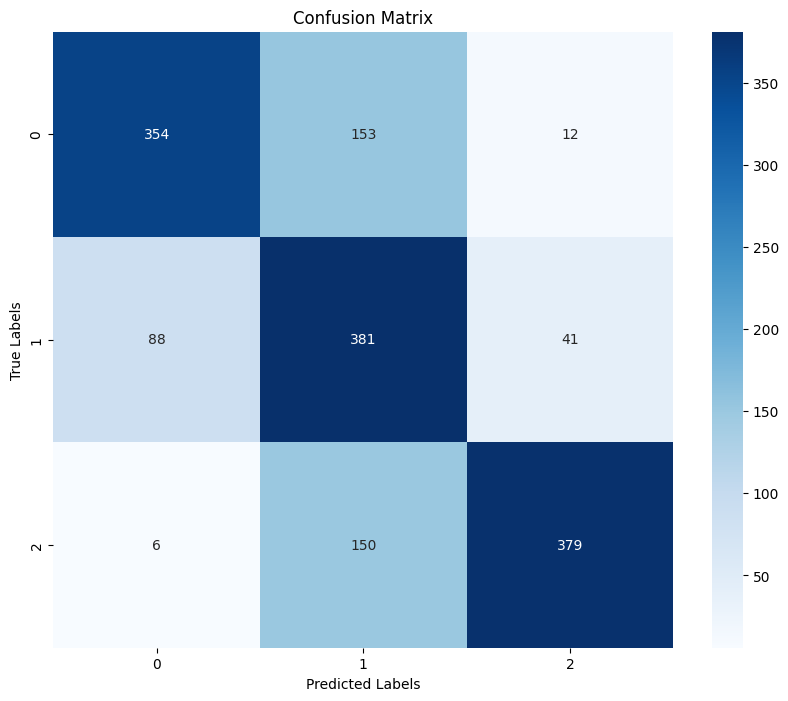

In [49]:
# train and calculate the metrics:
train_losses, val_losses, train_accs, val_accs =\
      train_val(model,train_loader, val_loader, optimizer, num_epochs)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

# test the model:
test(model, test_loader)